<a href="https://colab.research.google.com/github/ranishrocks/cs367-ai-lab/blob/main/lab%202/Lab2(In_Lab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pseudocode and Flow Chart

Pseudo Code

In [ ]:
function GraphSearch(problem):
    frontier = Queue(problem.initial_state)
    explored = Set()

    while frontier is not empty:
        node = frontier.remove()
        if problem.is_goal(node.state):
            return Solution(node)
        explored.add(node.state)

        for action in problem.actions(node.state):
            child = ChildNode(problem, node, action)
            if child.state not in explored and child not in frontier:
                frontier.add(child)

    return Failure

Flow Chart

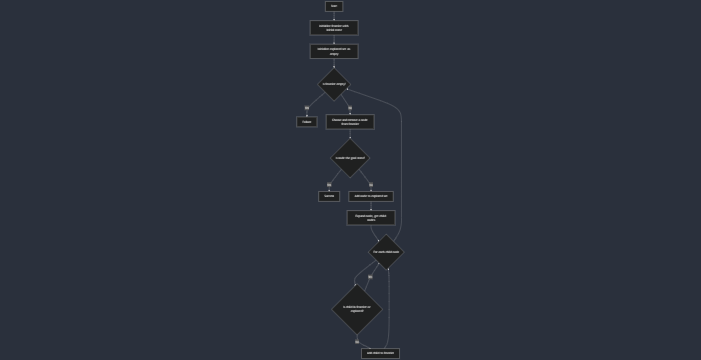

Implementation details and reasons:


*   We use a queue for the frontier to implement a breadth-first search.This ensures we find the shallowest goal state first.
*   We use a set for the explored states to allow for quick lookups, preventing revisiting of states.
*   We check if a node is the goal state before exploring it, which can save time in some cases.
*   We only add a child to the frontier if it's not been explored and is not already in the frontier, preventing unnecessary work.









# Functions imitating the environment for Puzzle-8

In [ ]:
from collections import deque
class Puzzle8:
    def __init__(self, initial_state):
        self.initial_state = initial_state
        self.goal_state = [1, 2, 3, 4, 5, 6, 7, 8, 0]  # 0 represents the empty tile

    def is_goal(self, state):
        return state == self.goal_state

    def actions(self, state):
        actions = []
        empty_index = state.index(0)
        row, col = empty_index // 3, empty_index % 3

        if row > 0: actions.append('UP')
        if row < 2: actions.append('DOWN')
        if col > 0: actions.append('LEFT')
        if col < 2: actions.append('RIGHT')

        return actions

    def result(self, state, action):
        new_state = state.copy()
        empty_index = state.index(0)

        if action == 'UP':
            new_state[empty_index], new_state[empty_index - 3] = new_state[empty_index - 3], new_state[empty_index]
        elif action == 'DOWN':
            new_state[empty_index], new_state[empty_index + 3] = new_state[empty_index + 3], new_state[empty_index]
        elif action == 'LEFT':
            new_state[empty_index], new_state[empty_index - 1] = new_state[empty_index - 1], new_state[empty_index]
        elif action == 'RIGHT':
            new_state[empty_index], new_state[empty_index + 1] = new_state[empty_index + 1], new_state[empty_index]

        return new_state

    def cost(self, state, action):
        return 1  # Uniform cost for all actions

class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

def graph_search(problem):
    node = Node(problem.initial_state)
    if problem.is_goal(node.state):
        return node
    frontier = deque([node])
    explored = set()

    while frontier:
        node = frontier.popleft()
        explored.add(tuple(node.state))

        for action in problem.actions(node.state):
            child_state = problem.result(node.state, action)
            child = Node(child_state, node, action, node.path_cost + problem.cost(node.state, action))
            if problem.is_goal(child.state):
                return child
            if tuple(child.state) not in explored and child not in frontier:
                frontier.append(child)

    return None

# Iterative Deepening Search


Iterative Deepening Search (IDS) is a strategy that combines the space-efficiency of depth-first search with the completeness of breadth-first search. It works as follows:

It starts with a depth limit of 0 and performs a depth-limited search.
If the goal is not found, it increases the depth limit by 1 and repeats the search.
This process continues until the goal is found or the maximum depth is reached.

IDS has the following advantages:

It's complete like BFS (will find a solution if one exists)
It's optimal for unweighted graphs (finds the shallowest goal state)
It has the space efficiency of DFS (O(bd) where b is branching factor and d is depth)

The main disadvantage is that it repeats work at shallower depths, but this is often outweighed by its benefits, especially in problems with unknown or large search depths.

# Backtracking Function

In [ ]:
def backtrack_path(node):
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return list(reversed(path))

# Generating Puzzle-8 instances


In [ ]:
import random

def generate_puzzle(depth):
    puzzle = Puzzle8([1, 2, 3, 4, 5, 6, 7, 8, 0])
    state = puzzle.goal_state
    for _ in range(depth):
        action = random.choice(puzzle.actions(state))
        state = puzzle.result(state, action)
    return state

# Table of memory and time requirements

In [ ]:
import time
import psutil
import statistics

def measure_performance(depths, num_instances=10):
    results = {}
    for d in depths:
        times = []
        memories = []
        for _ in range(num_instances):
            initial_state = generate_puzzle(d)
            puzzle = Puzzle8(initial_state)

            start_time = time.time()
            start_memory = psutil.Process().memory_info().rss / 1024 / 1024  # in MB

            solution = graph_search(puzzle)

            end_time = time.time()
            end_memory = psutil.Process().memory_info().rss / 1024 / 1024  # in MB

            times.append(end_time - start_time)
            memories.append(end_memory - start_memory)

        results[d] = {
            'avg_time': statistics.mean(times),
            'avg_memory': statistics.mean(memories)
        }

    return results

In [ ]:
def print_puzzle(state):
    for i in range(0, 9, 3):
        print(state[i:i+3])
    print()

# Run tests
if __name__ == "__main__":
    # Test puzzle generation and solution
    print("Testing puzzle generation and solution:")
    for depth in [2, 4, 6, 8]:
        initial_state = generate_puzzle(depth)
        puzzle = Puzzle8(initial_state)
        print(f"Puzzle at depth {depth}:")
        print_puzzle(initial_state)

        solution_node = graph_search(puzzle)
        if solution_node:
            path = backtrack_path(solution_node)
            print(f"Solution found in {len(path) - 1} steps")
        else:
            print("No solution found")
        print()

    # Measure performance
    print("Measuring performance:")
    depths = [2, 4, 6, 8, 10]
    results = measure_performance(depths)

    print("| Depth | Average Time (s) | Average Memory (MB) |")
    print("|-------|------------------|---------------------|")
    for depth, data in results.items():
        print(f"| {depth:<5} | {data['avg_time']:<16.3f} | {data['avg_memory']:<19.3f} |")


Testing puzzle generation and solution:
Puzzle at depth 2:
[1, 2, 3]
[4, 5, 6]
[0, 7, 8]

Solution found in 2 steps

Puzzle at depth 4:
[1, 2, 0]
[4, 6, 3]
[7, 5, 8]

Solution found in 4 steps

Puzzle at depth 6:
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

Solution found in 2 steps

Puzzle at depth 8:
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]

Solution found in 0 steps

Measuring performance:
| Depth | Average Time (s) | Average Memory (MB) |
|-------|------------------|---------------------|
| 2     | 0.001            | 0.000               |
| 4     | 0.000            | 0.000               |
| 6     | 0.000            | 0.000               |
| 8     | 0.000            | 0.000               |
| 10    | 0.001            | 0.026               |
